# Example of use of the new radiospectra module

S. Beck, S. Bühler, A. Csillaghy, FHNW

This package updates and extends the e-Callisto parts of the existing https://github.com/sunpy/radiospectra repository. The aim of the extension is to provide 

* A more reliable background subtraction,
* A possibility of working with several instruments at the same time
* An easier way to look at polarizations

In [1]:
# This is temporary and will be eventually removed. 
# It allow to override the sunpy radiospectra module with the local one for testing by adding an additional path

import os, sys, datetime
top_dir = os.path.split(os.path.realpath('.'))[0]
if top_dir != sys.path[0] and top_dir != sys.path[1]:
    sys.path.insert(1,top_dir)
path_to_import = os.path.abspath(top_dir + os.sep + "radiospectra")

import radiospectra
if(path_to_import != os.path.abspath(radiospectra.__path__[0])):
    print(f'Module to import: {path_to_import}')
    print(f'Module that was imported: {os.path.abspath(radiospectra.__path__[0])}')
    raise Exception('Wrong radiospectra module was imported. (not local)')
else:
    print(f'Imported local radiospectra from: {os.path.abspath(radiospectra.__path__[0])}')
from radiospectra.sources import CallistoSpectrogram

Imported local radiospectra from: D:\Work\main_project\new\radiospectra\radiospectra


D:\Work\main_project\new\radiospectra\radiospectra\version.py:12: UserWarning: could not determine radiospectra package version; this indicates a broken installation
  warnings.warn(


In [2]:
# let us do a bit larger images, as spectrograms have a lot of pixels in x-direction
# image display settings

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

In [3]:
print( sys.path )

['D:\\Work\\main_project\\new\\radiospectra\\examples', 'D:\\Work\\main_project\\new\\radiospectra', 'C:\\Users\\Ariel\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\Ariel\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\Ariel\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\Ariel\\AppData\\Local\\Programs\\Python\\Python310', 'd:\\work\\main_project\\new\\radiospectra_venv', '', 'd:\\work\\main_project\\new\\radiospectra_venv\\lib\\site-packages', 'd:\\work\\main_project\\new\\radiospectra_venv\\lib\\site-packages\\win32', 'd:\\work\\main_project\\new\\radiospectra_venv\\lib\\site-packages\\win32\\lib', 'd:\\work\\main_project\\new\\radiospectra_venv\\lib\\site-packages\\Pythonwin']


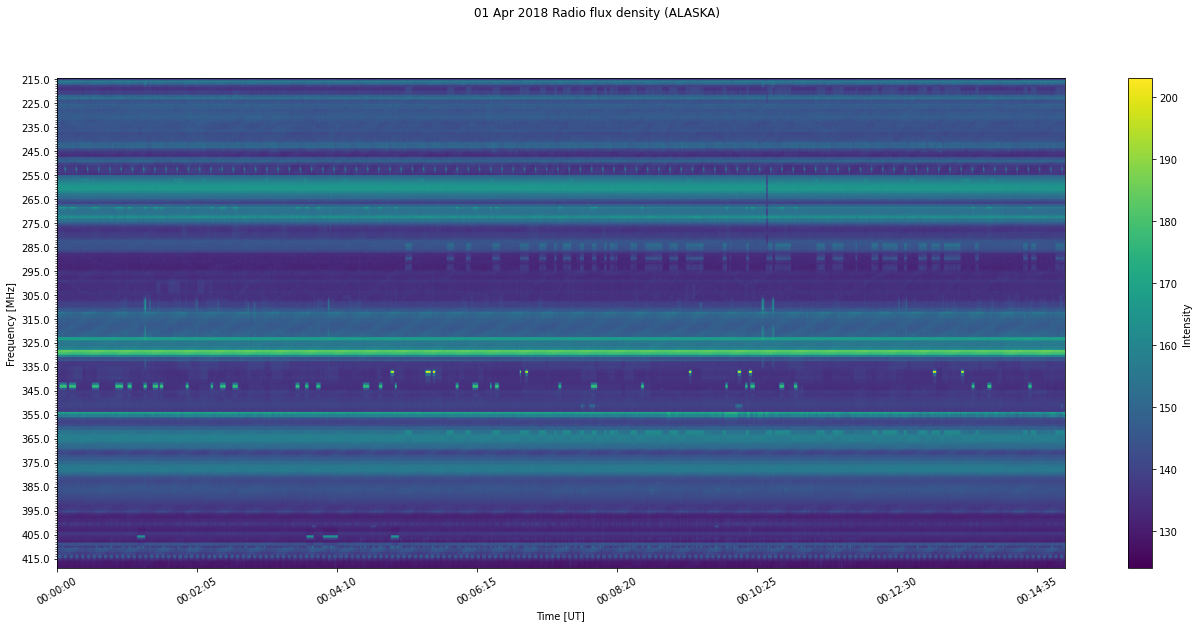

In [4]:
# read CallistoSpectrogram from fits file

spec = CallistoSpectrogram.read("example_callisto_border/ALASKA_20180401_000000_59.fit.gz")
spec.peek()
%xdel spec

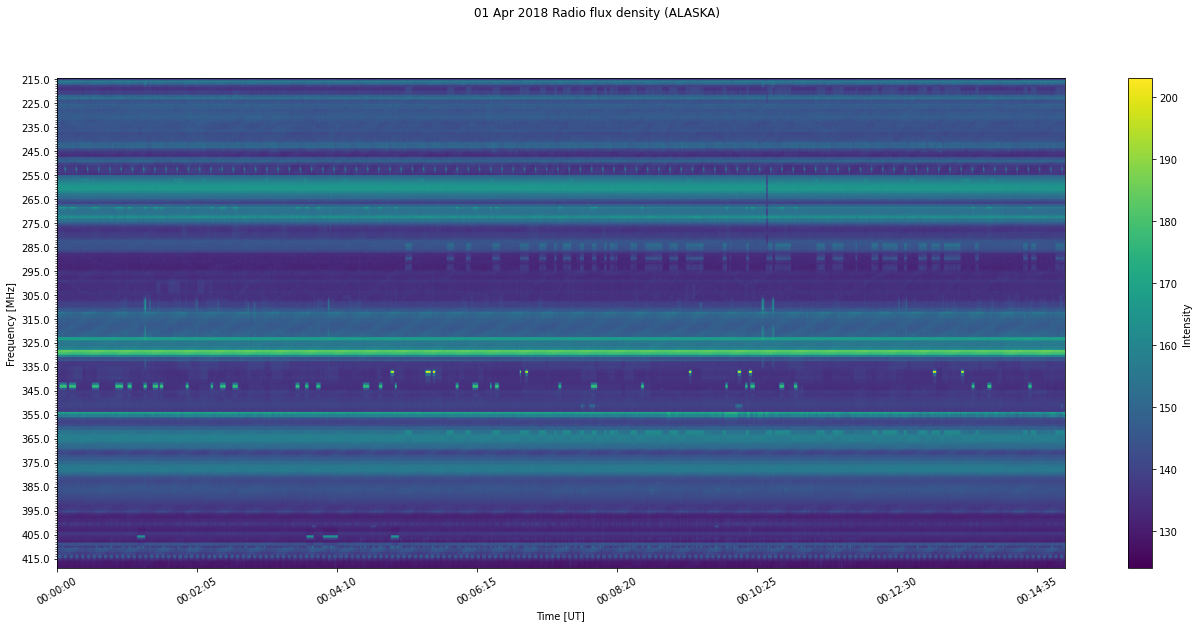

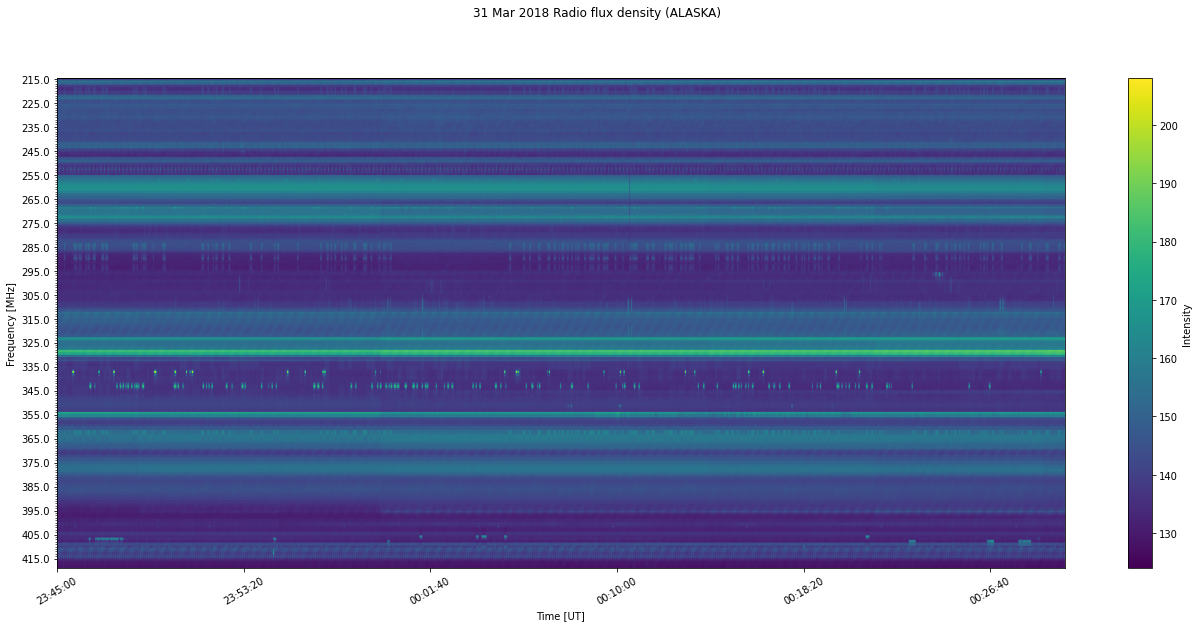

In [5]:
# read CallistoSpectrogram from fits file and extend it

spec = CallistoSpectrogram.read("example_callisto_border/ALASKA_20180401_000000_59.fit.gz")
spec.peek()
spec = spec.extend().extend(-1)
spec.peek()
%xdel spec

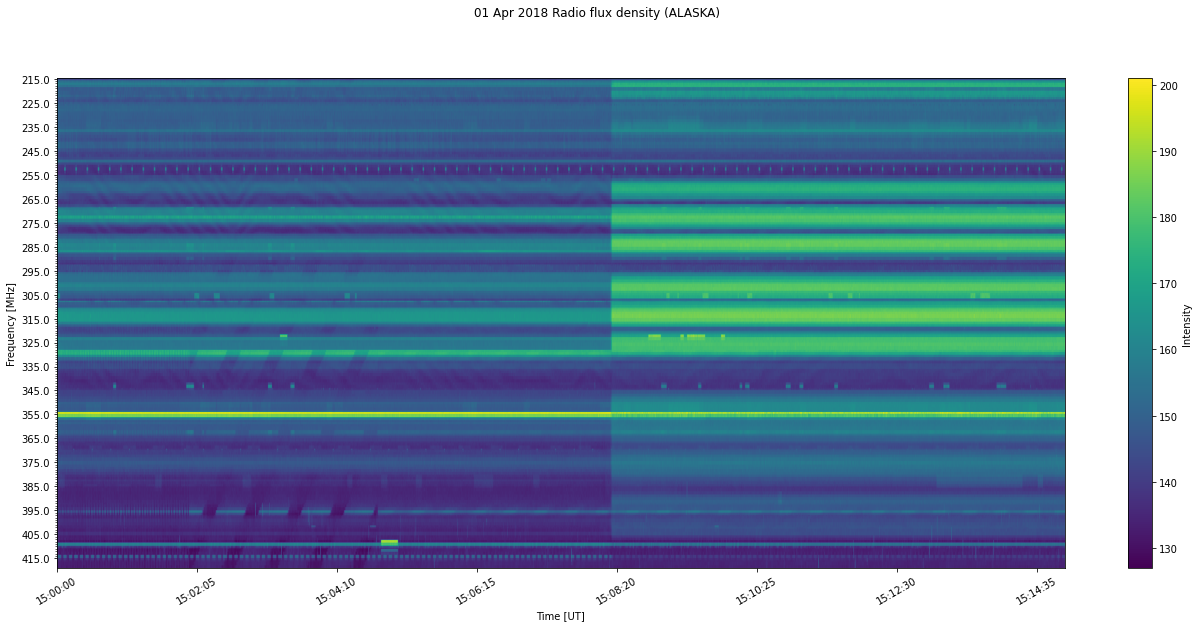

In [6]:
# load CallistoSpectrogram from the internet via url

spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2018/04/01/ALASKA_20180401_150000_59.fit.gz')
spec.peek()
%xdel spec

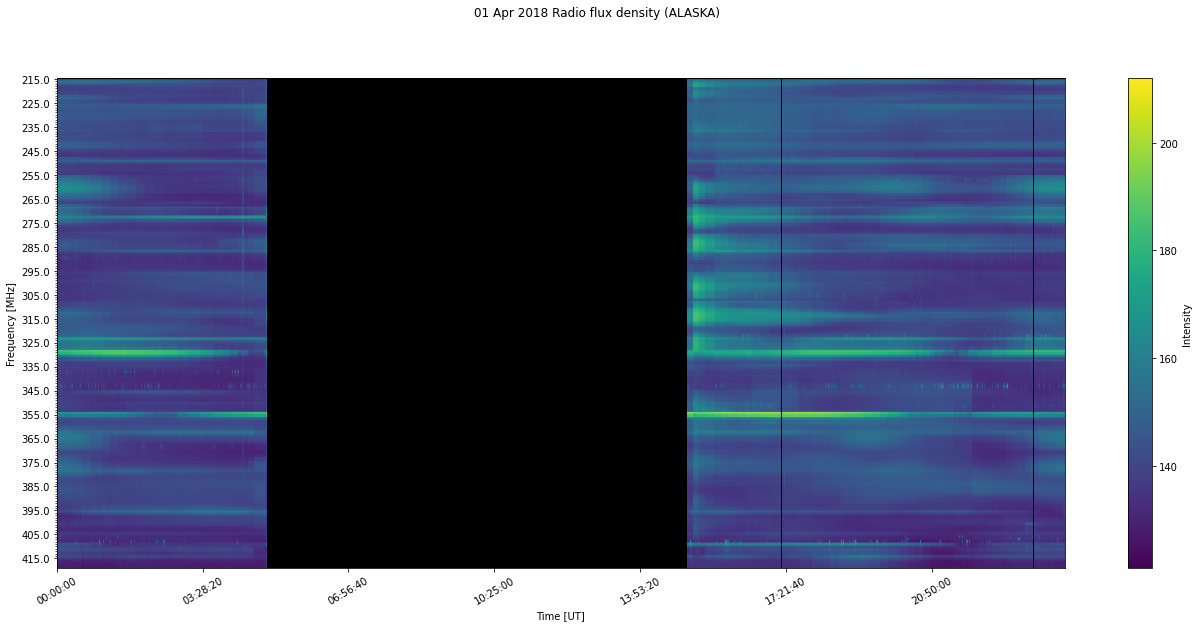

(193, 345600)


In [7]:
# load CallistoSpectrogram's in a time range from the internet and combine them

spec = CallistoSpectrogram.from_range('ALASKA', '2018-04-01T00:00:00', '2018-04-02T00:00:00')
spec.peek()
print(spec.shape)
%xdel spec

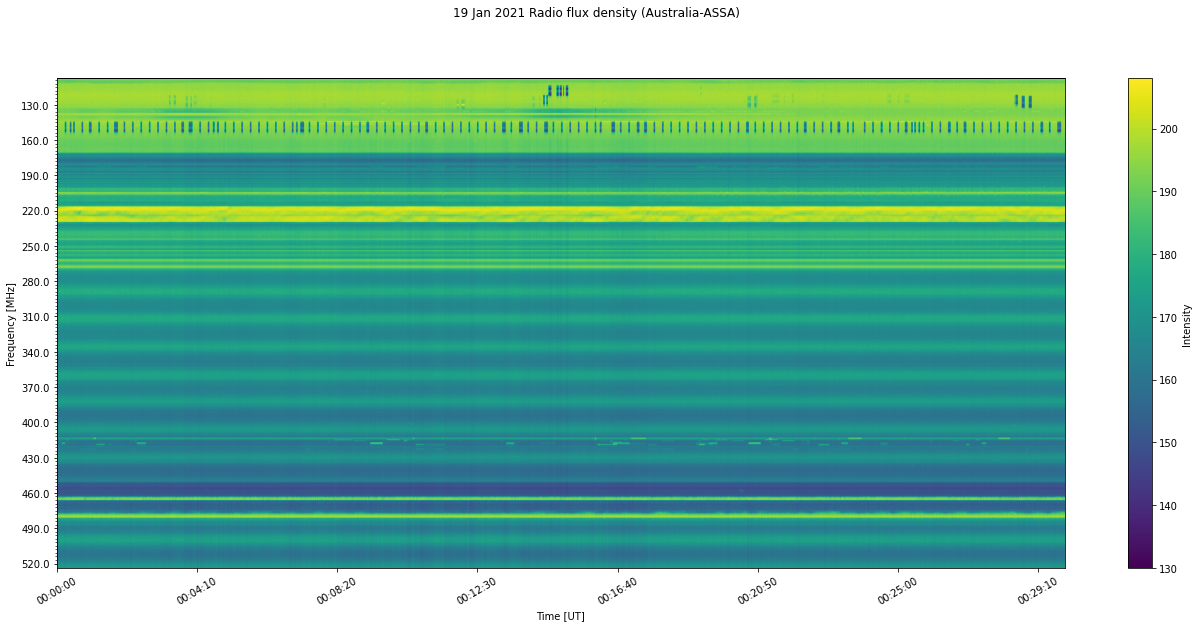

In [8]:
# Fixing 2 seconds interval

spec = CallistoSpectrogram.from_range('Australia-ASSA', '2021-01-19T00:00:00', '2021-01-19T00:18:00')
spec.peek()
%xdel spec

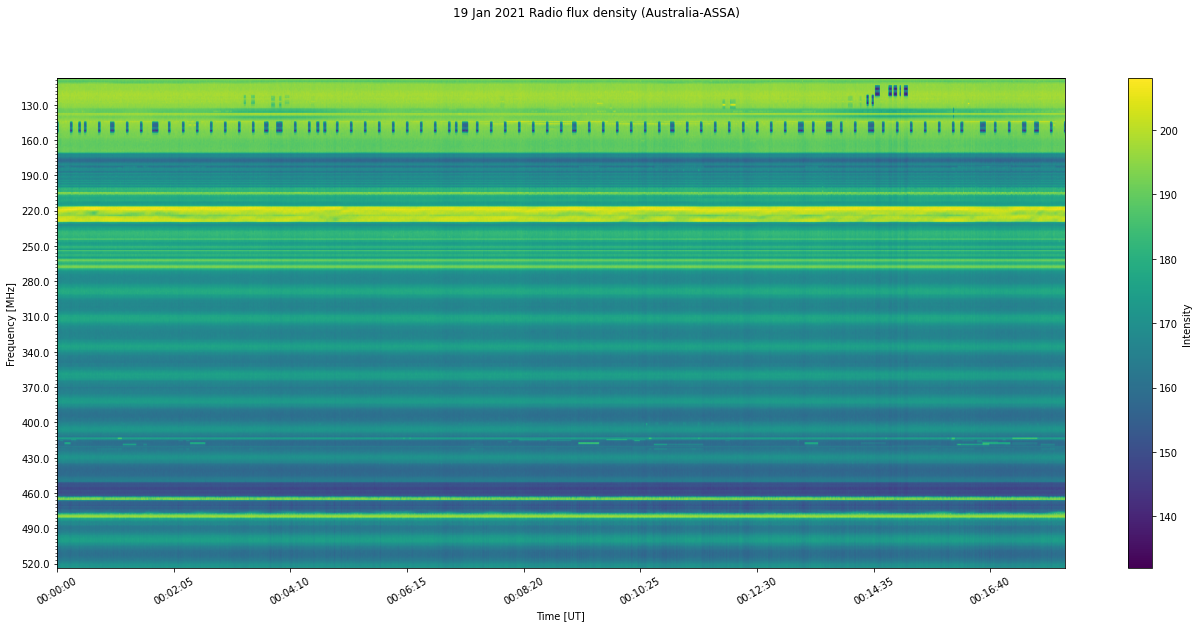

In [9]:
spec = CallistoSpectrogram.from_range('Australia-ASSA', '2021-01-19T00:00:00', '2021-01-19T00:18:00', exact=True)
spec.peek()
%xdel spec

From 2021-01-19 03:10:00 to 2021-01-19 03:50:00
Callisto Spectogram from 2021-01-19 03:00:00 to 2021-01-19 04:00:00


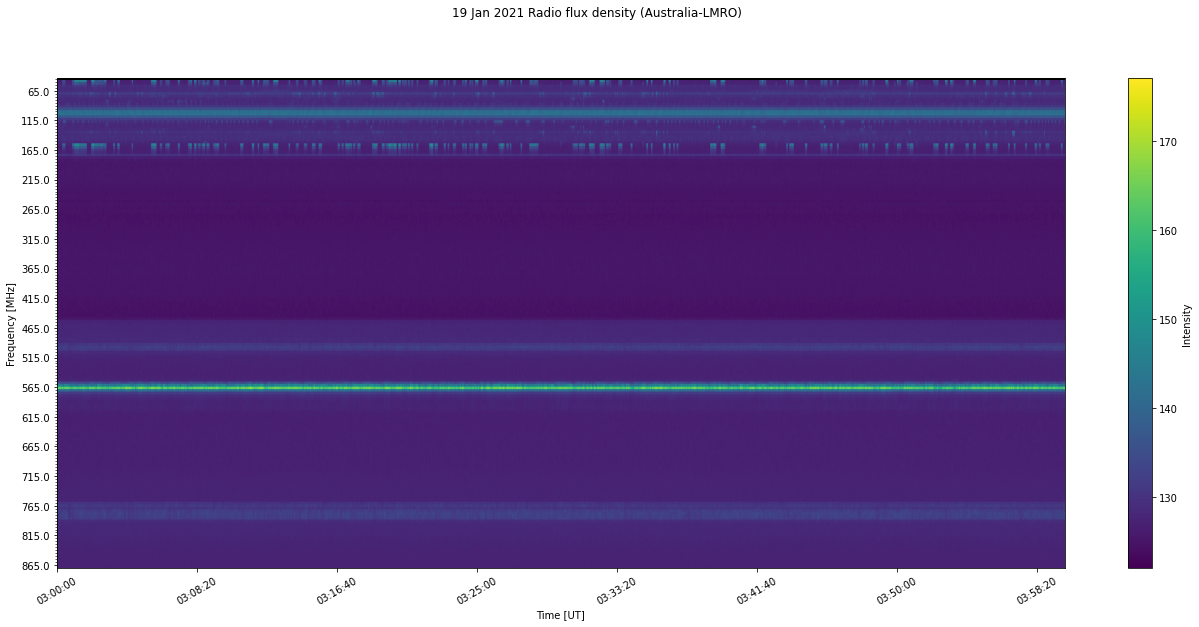

From 2021-01-19 03:10:00 to 2021-01-19 03:50:00
Callisto Spectogram from 2021-01-19 03:10:00 to 2021-01-19 03:50:00


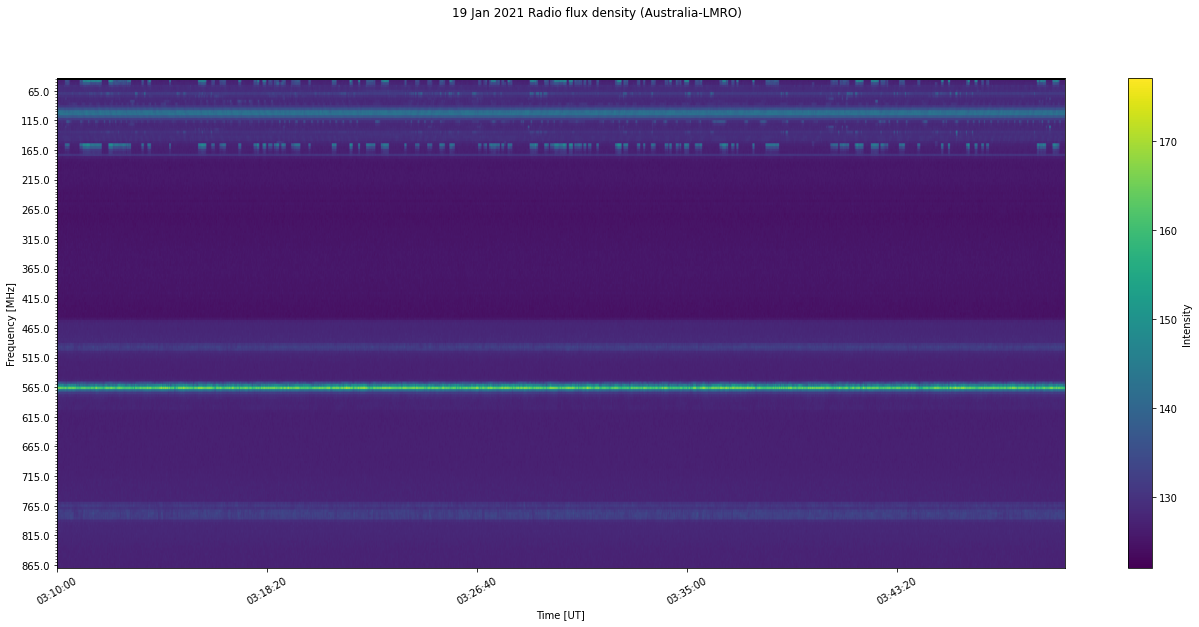

Using distribution
From 2021-01-19 03:57:00 to 2021-01-19 04:05:00
Callisto Spectogram from 2021-01-19 03:57:00 to 2021-01-19 04:12:00


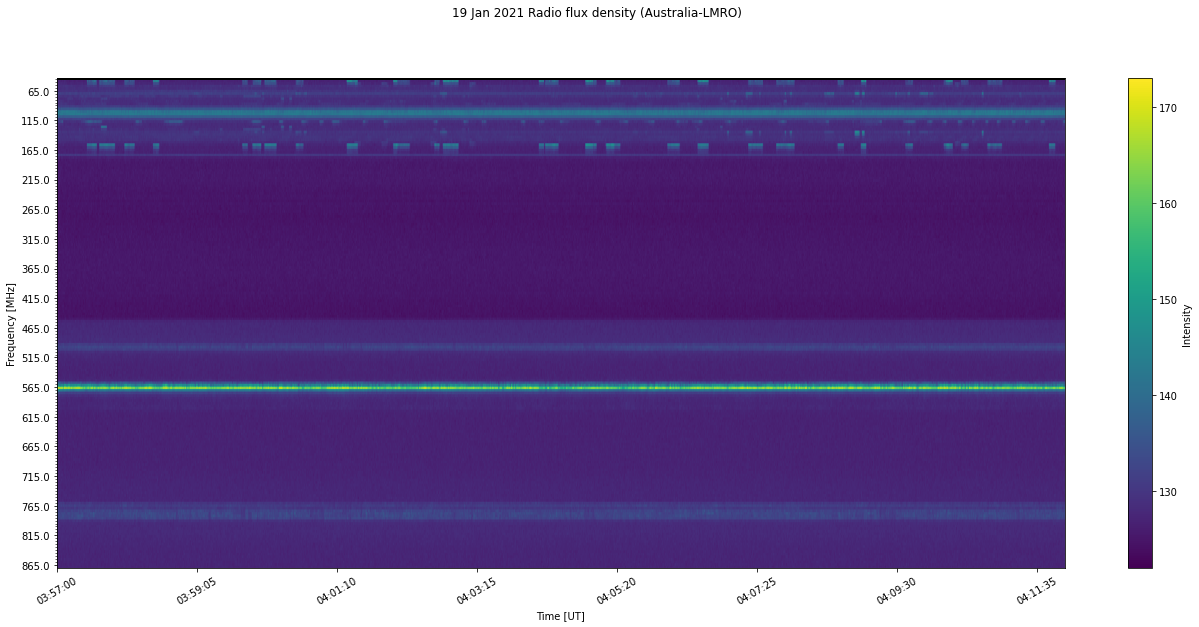

In [10]:
# load CallistoSpectrogram's in a time range from the internet and combine them
# Adding new parameter exact = True (False by default) you get only the data you request.
# Adding new parameter distribution > 1 (1 by default) you get only the data you request but extend it for get n pieces of 15 minutes.

start = datetime.datetime(2021, 1, 19, 3, 10)
end = datetime.datetime(2021, 1, 19, 3, 50)

spec = CallistoSpectrogram.from_range('Australia-LMRO', start.isoformat(), end.isoformat())
print(f"From {start} to {end}")
print(f"Callisto Spectogram from {spec.start} to {spec.end}")
spec.peek()
%xdel spec

spec = CallistoSpectrogram.from_range('Australia-LMRO', start.isoformat(), end.isoformat(), exact=True)
print(f"From {start} to {end}")
print(f"Callisto Spectogram from {spec.start} to {spec.end}")
spec.peek()
%xdel spec

print("Using distribution")
start = datetime.datetime(2021, 1, 19, 3, 57)
end = datetime.datetime(2021, 1, 19, 4, 5)

spec = CallistoSpectrogram.from_range('Australia-LMRO', start.isoformat(), end.isoformat(), exact=True, distribution=15)
print(f"From {start} to {end}")
print(f"Callisto Spectogram from {spec.start} to {spec.end}")
spec.peek()
%xdel spec

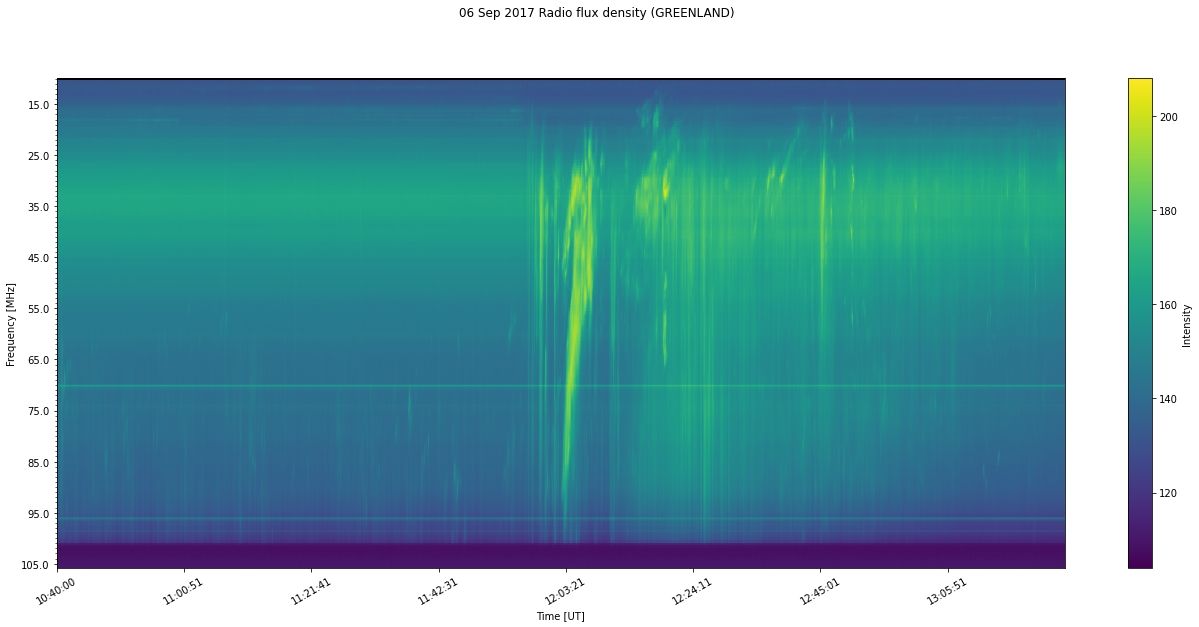

In [11]:
# Load and join a series of spectrograms of the same instrument

import os
spectrograms = []

for root, dirs, files in os.walk("example_callisto_joining", topdown = False):
    for file in files:
        full_name = os.path.join(root, file)
        spec = CallistoSpectrogram.read(full_name)
        spectrograms.append(spec)
        
spec_joined = CallistoSpectrogram.new_join_many(spectrograms)
spec_joined.peek()
%xdel spectrograms

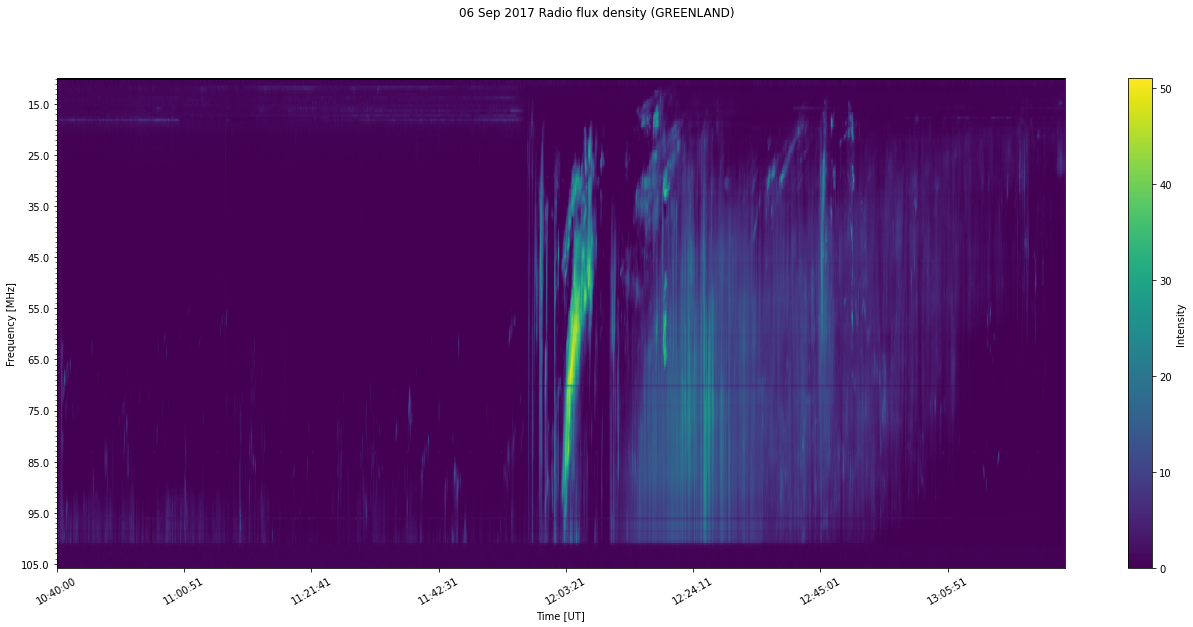

In [12]:
# current implementation of the background subtraction

spec_joined_default_bgs = spec_joined.subtract_bg()
spec_joined_default_bgs.peek(vmin=0)
%xdel spec_joined_default_bgs

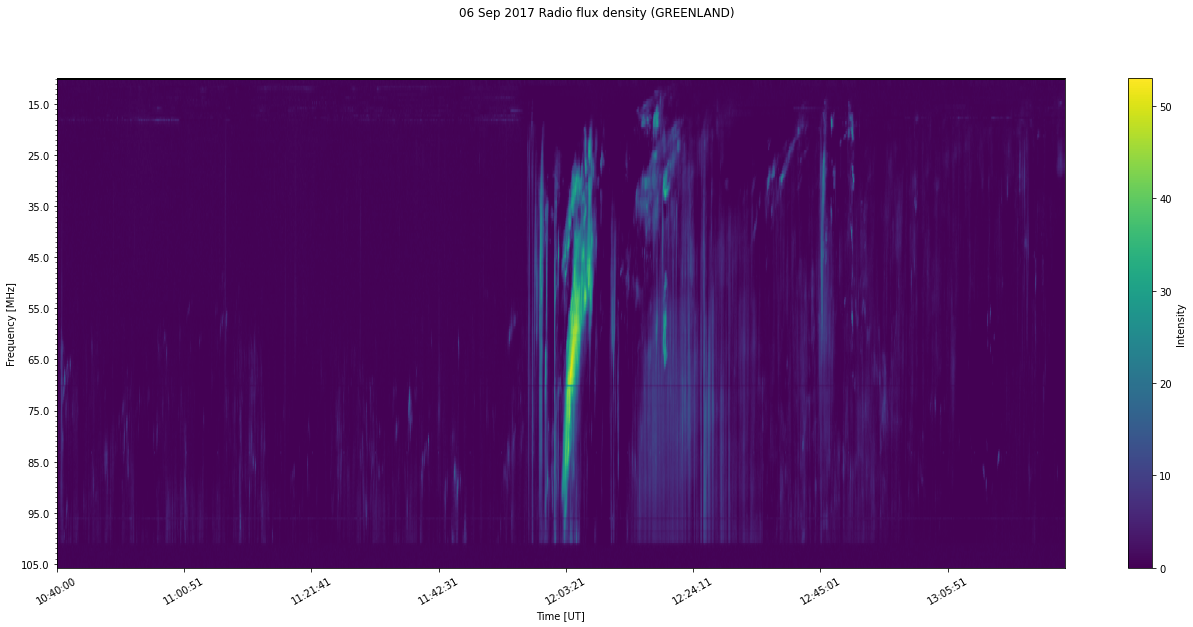

In [13]:
# new implementation of the background subtraction with a sliding window
# Arguments:
#   window_width   - the width of the sliding window that is used to determine the background for the current position
#   affected_width - the width of the "window" for that the current determined background is used
#                    also determines how much the sliding window is moved each itteration
#   amount         - The percent amount (out of 1) of lowest standard deviation to consider.
#                    (this is the same as in the current implementation BUT applied to the sliding window)

# NOTE:
# currently returns three CallistoSpectrogram objects to make it easier to view the results
# 1. The original spectrogram with the background subtracted
# 2. The detected background
# 3. A plot to show which columns were used how many times in the process of detecing the background
# 4. The (detected) change points that were used (not a CallistoSpectrogram object)
# This is used to debug and analyze.
# This is not to stay like this since number three is no Spectrogram
# and the headers of number one and two are not adjusted to the background subtraction
# The final version should only return number one with correct headers
# Number two and three should still be made available since they carry potentially important information

sliding_bgs, sliding_bg_only, sliding_column_freq, change_points = spec_joined.subtract_bg_sliding_window(
    window_width=5000, affected_width=10, amount=0.05)
sliding_bgs.peek(vmin=0)
%xdel change_points
%xdel spec_joined
%xdel sliding_bg_only
%xdel sliding_column_freq
%xdel sliding_bgs

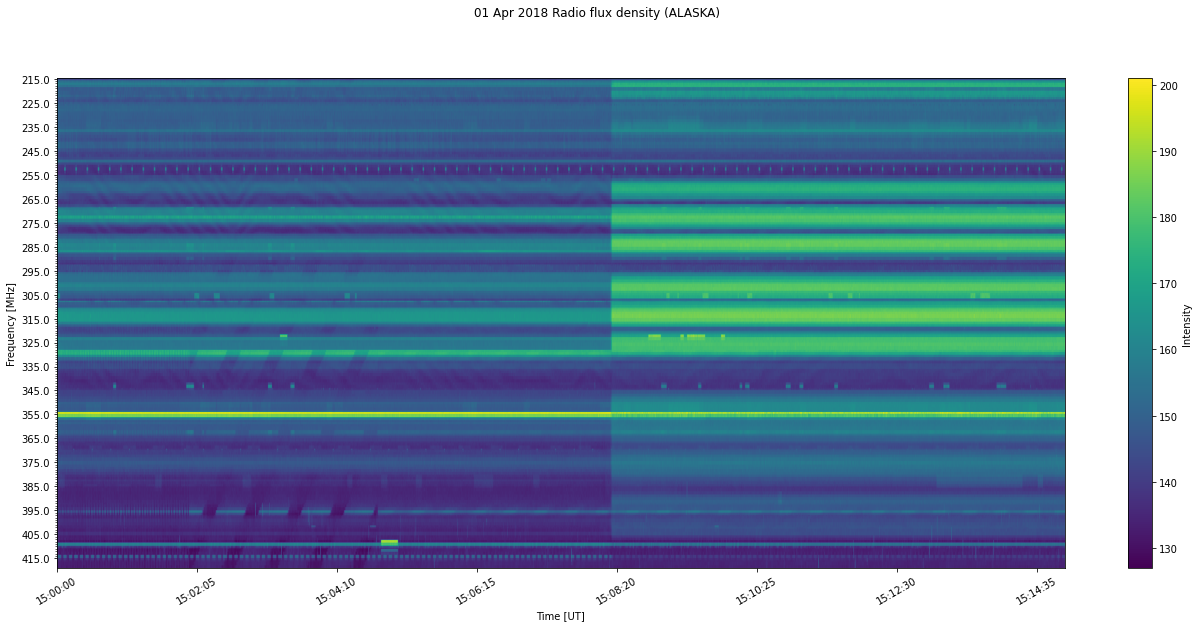

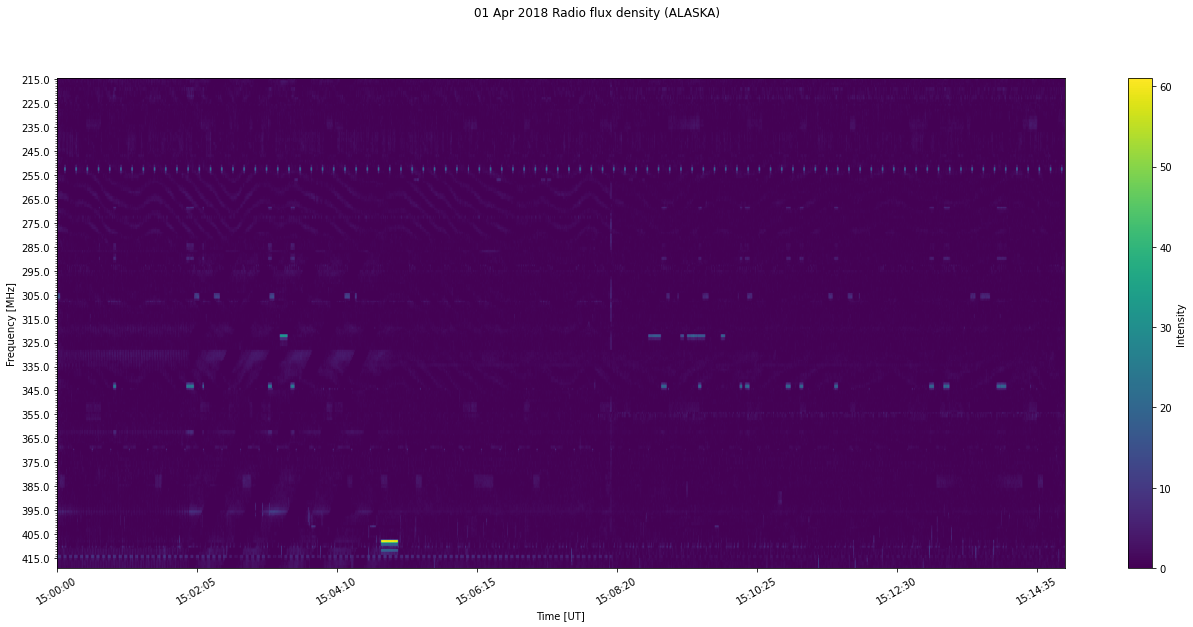

In [14]:
# new background subtraction with one change point

spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2018/04/01/ALASKA_20180401_150000_59.fit.gz')
spec.peek()
bgs,_,_,_ = spec.subtract_bg_sliding_window(window_width=200, affected_width=1, amount=0.05, change_points = [1980])
bgs.peek(vmin=0)

%xdel bgs

detected change points: [1980]


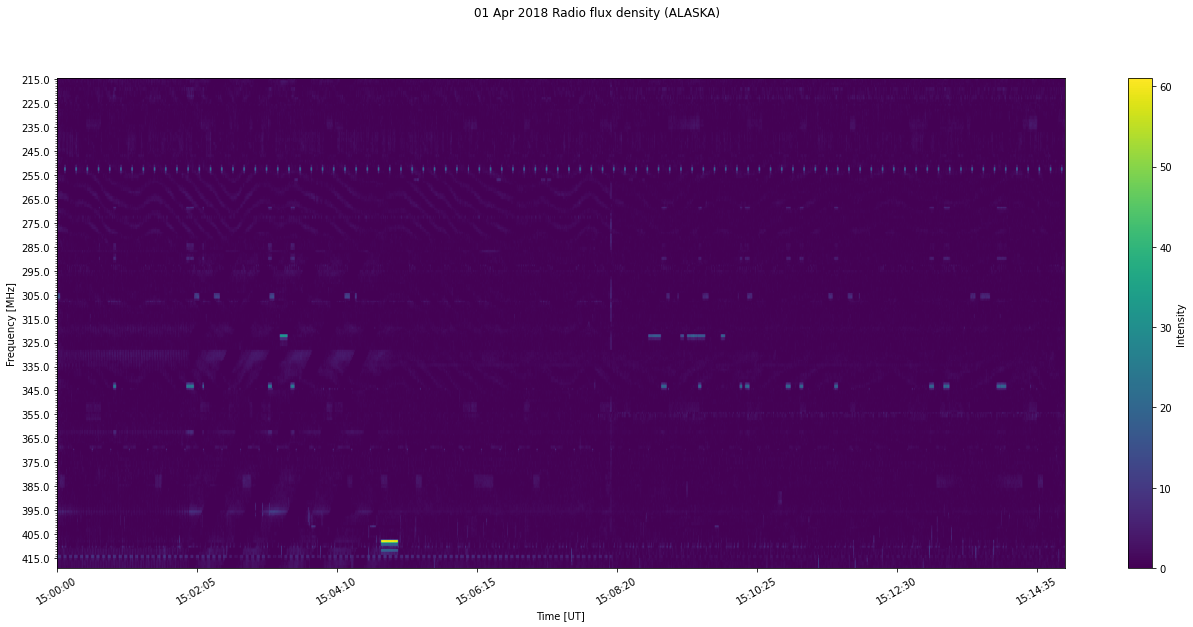

In [15]:
# new background subtraction with automatic change point detection (with raptures library)

bgs,_,_,cps = spec.subtract_bg_sliding_window(window_width=200, affected_width=1, amount=0.05, change_points = True)
print(f'detected change points: {cps}')
bgs.peek(vmin=0)

%xdel spec

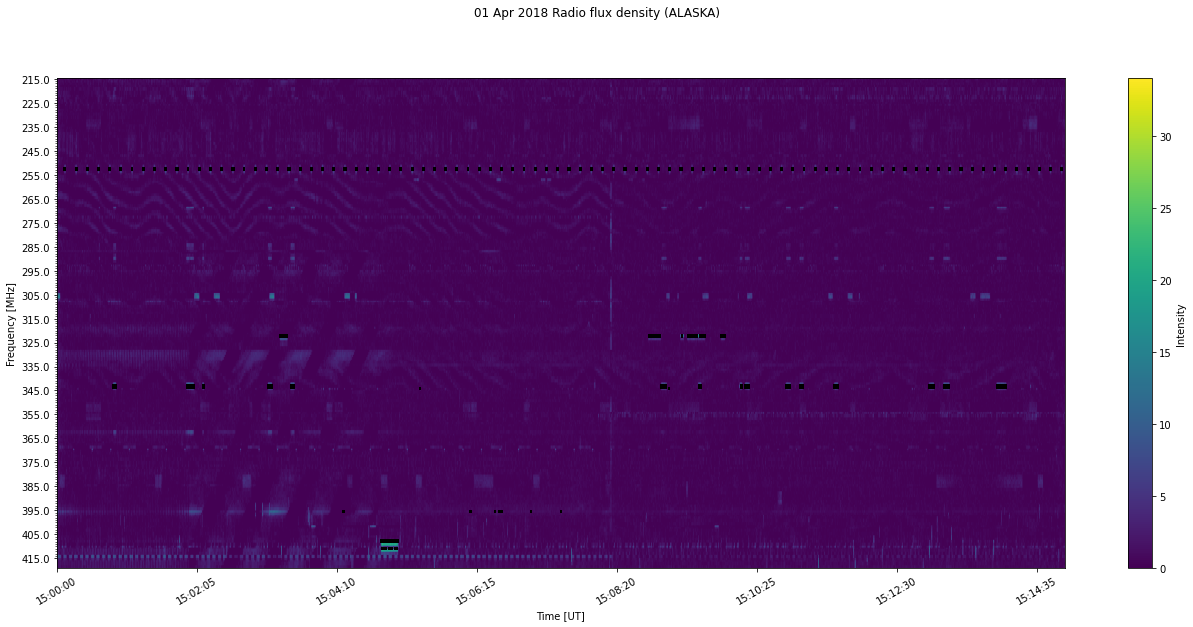

In [16]:
# single frequency rfi removal

rfi_rm = bgs.remove_single_freq_rfi(threshold=17, row_window_height=3)
rfi_rm.peek(vmin=0)

%xdel bgs

In [17]:
# Save the generated CallistoSpectrogram

from time import gmtime, strftime
file_name_save = str(f'example_callisto_joined/joined_{rfi_rm.filename}.fit.gz')
file_path = rfi_rm.save(file_name_save)
print(f'file saved under: {file_path}')
%xdel rfi_rm

FileNotFoundError: [Errno 2] No such file or directory: 'example_callisto_joined/joined_ALASKA_20180401_150000_59.fit.gz.fit.gz'

In [ ]:
# Load and display the saved CallistoSpectrogram

spec = CallistoSpectrogram.read(file_path)
spec.peek(vmin=0)
%xdel spec